In [1]:
import pandas as pd

In [3]:
subject0_Imagery_hands = pd.read_csv("/content/subject0_Imagery_hands.csv")
subject0_Imagery_tongues = pd.read_csv("/content/subject0_Imagery_tongues.csv")
subject0_Real_hands = pd.read_csv("/content/subject0_Real_hands.csv")
subject0_Real_tongues = pd.read_csv("/content/subject0_Real_tongues.csv")

In [4]:
subject2_Imagery_hands = pd.read_csv("/content/subject2_Imagery_hands.csv")
subject2_Imagery_tongues = pd.read_csv("/content/subject2_Imagery_tongues.csv")
subject2_Real_hands = pd.read_csv("/content/subject2_Real_hands.csv")
subject2_Real_tongues = pd.read_csv("/content/subject2_Real_tongues.csv")

In [40]:
print("This is acceptable")

This is acceptable


# Makes data in real and imagery forms

In [5]:
Imagery_frames = [subject0_Imagery_hands, subject0_Imagery_tongues, subject2_Imagery_hands, subject2_Imagery_tongues]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [6]:
Real_frames = [subject0_Real_hands, subject0_Real_tongues, subject2_Real_hands, subject2_Real_tongues]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [7]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,0.319480,0.000293,0
1,0,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,0.340468,0.000420,0
2,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,0.353153,0.000260,0
3,0,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,0.306466,0.000090,0
4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,0.312094,0.000258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,47,176.450452,0.029799,33.216046,0.005610,6.530403,0.001103,1.000416,0.000169,0.224647,0.000038,1
2876,47,191.219588,0.029378,47.845522,0.007351,8.047811,0.001236,1.148427,0.000176,0.247321,0.000038,1
2877,47,185.742916,0.027688,52.539384,0.007832,5.794241,0.000864,0.858207,0.000128,0.185568,0.000028,1
2878,47,91.805034,0.023122,36.576291,0.009212,8.641063,0.002176,1.178701,0.000297,0.178973,0.000045,1


In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_execution'],
      dtype='object')

In [10]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

## SCV

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

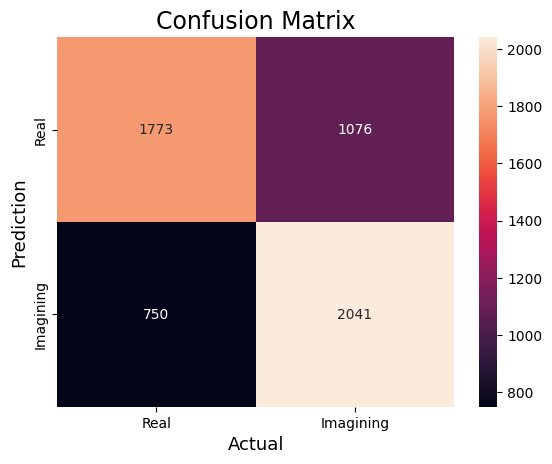

In [15]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.676241134751773


## Random Forest

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-18-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

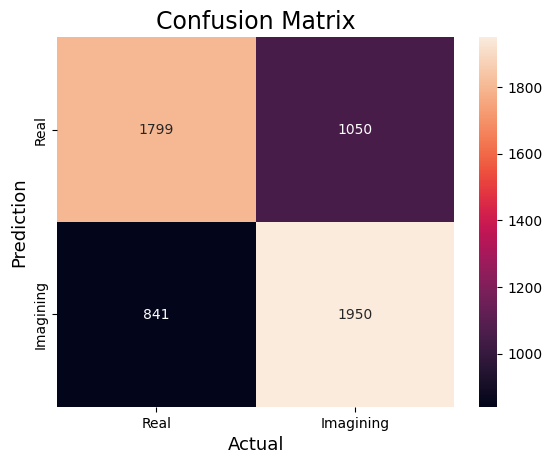

In [20]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.6647163120567375


# Makes data in hands and tongues forms

In [22]:
hand_frames = [subject0_Imagery_hands, subject0_Real_hands, subject2_Imagery_hands, subject2_Real_hands]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [23]:
tongues_frames = [subject0_Imagery_tongues, subject0_Real_tongues, subject2_Imagery_tongues, subject2_Real_tongues]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [24]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe

,elecro_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,0.319480,0.000293,0
1,0,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,0.340468,0.000420,0
2,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,0.353153,0.000260,0
3,0,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,0.306466,0.000090,0
4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,0.312094,0.000258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,47,176.450452,0.029799,33.216046,0.005610,6.530403,0.001103,1.000416,0.000169,0.224647,0.000038,1
2876,47,191.219588,0.029378,47.845522,0.007351,8.047811,0.001236,1.148427,0.000176,0.247321,0.000038,1
2877,47,185.742916,0.027688,52.539384,0.007832,5.794241,0.000864,0.858207,0.000128,0.185568,0.000028,1
2878,47,91.805034,0.023122,36.576291,0.009212,8.641063,0.002176,1.178701,0.000297,0.178973,0.000045,1


In [25]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [26]:
whole_dataframe.columns

Index(['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP', 'is_execution'],
      dtype='object')

In [27]:
features = ['elecro_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P', 'B3_RP', 'B4_P',
       'B4_RP', 'B5_P', 'B5_RP']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

## SCV

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

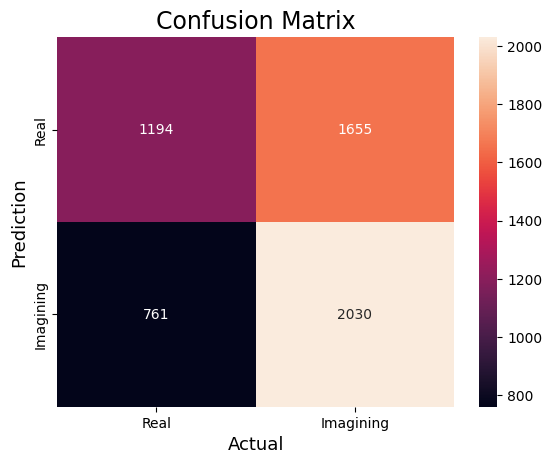

In [32]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','tongue'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.5716312056737589


## Random Forest

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-35-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

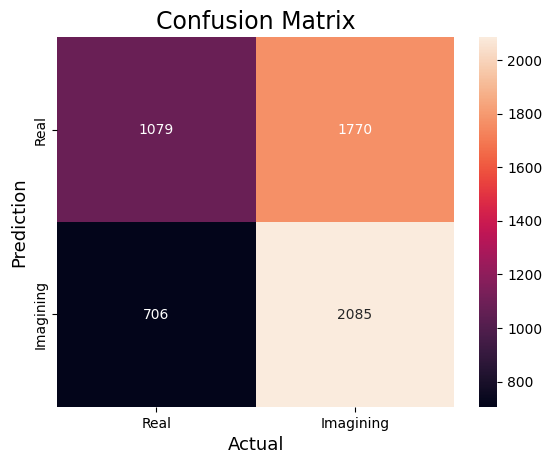

In [37]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.5609929078014184
